<a href="https://colab.research.google.com/github/Ashwani015/CV/blob/main/HeartdiseasePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data import and pre-processing

In [ ]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns


In [ ]:
cleveland = pd.read_csv('heart.csv')
cleveland.loc[0:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Handling Missing Data

In [ ]:
data = cleveland[~cleveland.isin(['?'])]
data.loc[0:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
data = data.dropna(axis = 0)
data.loc[0:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
print(data.shape)
print(data.dtypes)
data.describe()

(303, 14)
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Data Visualisation

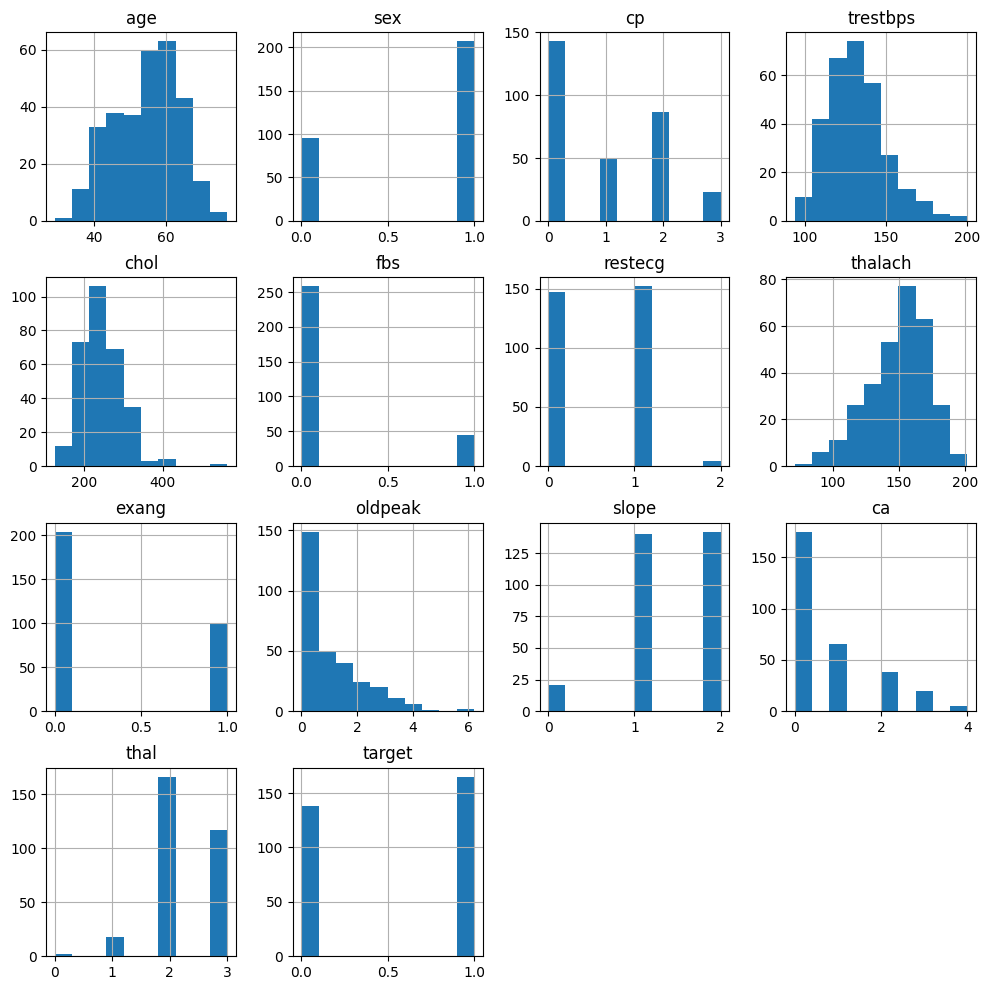

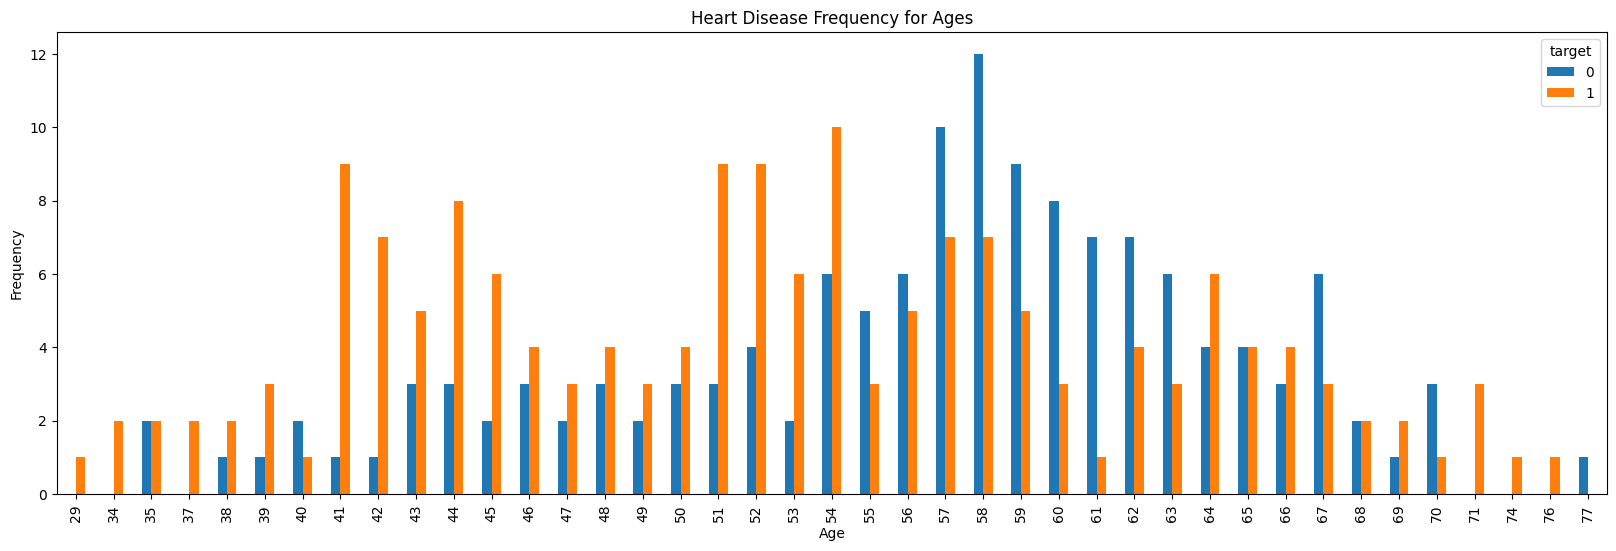

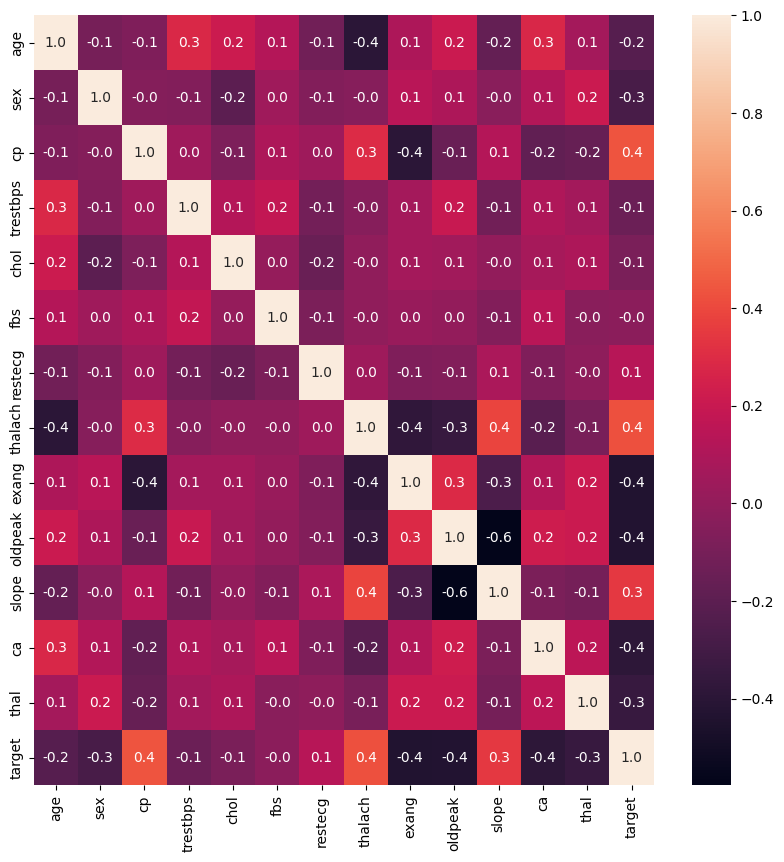

In [ ]:
#plotting histograms for each variable

data.hist(figsize=(12,12))
plt.show()
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

Training and Testing using ANN

In [ ]:
X = np.array(data.drop(['target'],1))
y = np.array(data['target'])
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std

#creating X and Y datasets for training

from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, stratify=y,random_state=42, test_size = 0.2)
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print(Y_train.shape)
print(Y_train[:10])
X_train[0]

(242, 2)
[[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


<ipython-input-9-2187b3bb4dd0>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(data.drop(['target'],1))


array([ 1.61392956, -1.46841752,  1.97312292,  0.47839125, -0.14038081,
       -0.41763453,  0.89896224,  0.05917329, -0.69663055,  0.65599028,
        0.97635214,  1.24459328, -0.51292188])

Testing data with accuracy and loss

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

#define a function to build model

def create_model():
  model = Sequential()
  model.add(Dense(16, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001),activation='relu'))
  model.add(Dropout(0.25))
  model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
  model.add(Dropout(0.25))
  model.add(Dense(2, activation='softmax'))
  #compile
  adam= Adam(learning_rate=0.001)
  model.compile(loss='categorical_crossentropy', optimizer ='rmsprop', metrics=['accuracy'])
  return model
model = create_model()
print(model.summary())

history=model.fit(X_train,Y_train, validation_data=(X_test, Y_test),epochs=50, batch_size=10)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                224       
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dropout_5 (Dropout)         (None, 8)                 0         
                                                                 
 dense_8 (Dense)             (None, 2)                 18        
                                                                 
Total params: 378
Trainable params: 378
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
25/25 [==============================] -

Model loss graph

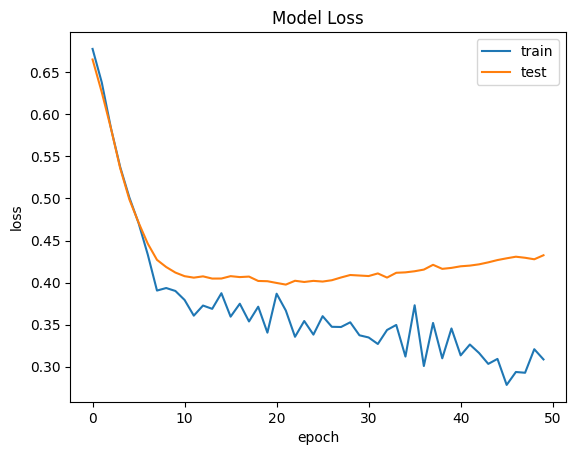

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

Model Accuracy Graph

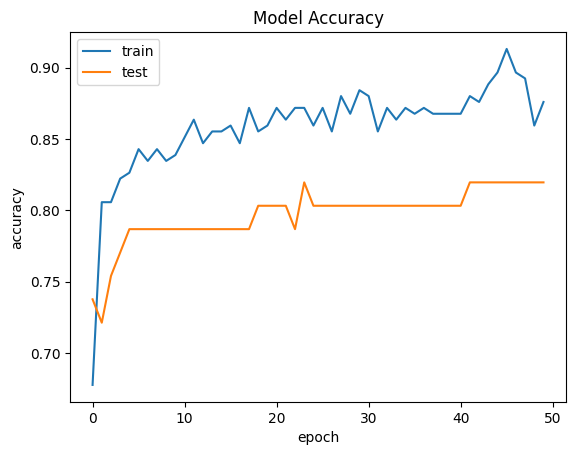

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
#Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

Training and testing using binary  classification algo

In [ ]:
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()
Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1
print(Y_train_binary[:20])
#define new kerad model
def create_binary_model():
  model = Sequential()
  model.add(Dense(16, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001),activation='relu'))
  model.add(Dropout(0.25))
  model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
  model.add(Dropout(0.25))
  model.add(Dense(1, activation='sigmoid'))
  #compile
  adam= Adam(learning_rate=0.001)
  model.compile(loss='binary_crossentropy', optimizer ='rmsprop', metrics=['accuracy'])
  return model
binary_model = create_binary_model()
print(binary_model.summary())

history = binary_model.fit(X_train,Y_train_binary, validation_data=(X_test,Y_test_binary), epochs=50,batch_size=10)

[1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1]
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                224       
                                                                 
 dropout_8 (Dropout)         (None, 16)                0         
                                                                 
 dense_13 (Dense)            (None, 8)                 136       
                                                                 
 dropout_9 (Dropout)         (None, 8)                 0         
                                                                 
 dense_14 (Dense)            (None, 1)                 9         
                                                                 
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5

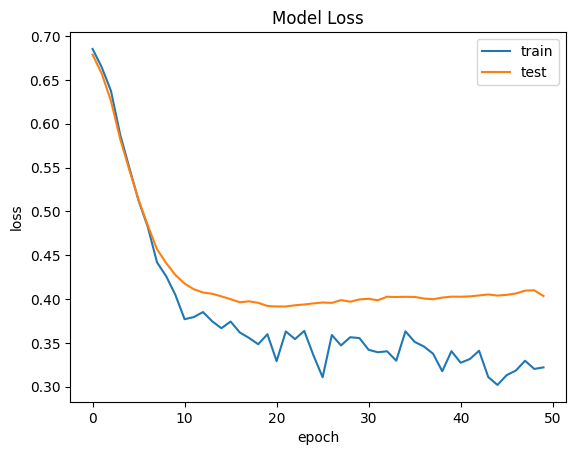

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

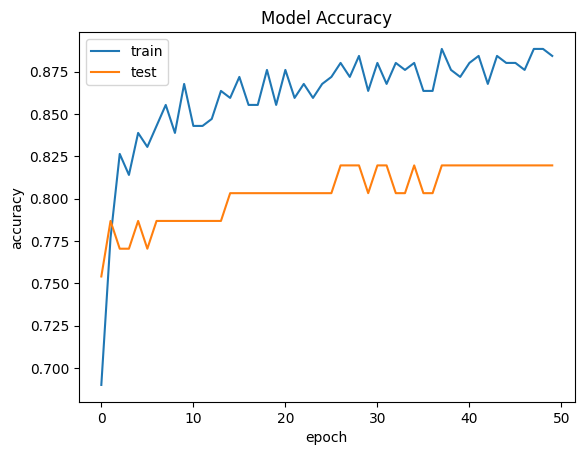

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
#Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

Genetic ALgorithm

In [ ]:
#initialising populations
import random
best =-100000
populations = [[1, 0, 0, 0,1],[1,1,1,0,1],[0,1,0,0,0],[1,0,0,1,1]]
parents=[]
new_populations=[]
print(populations)

[[1, 0, 0, 0, 1], [1, 1, 1, 0, 1], [0, 1, 0, 0, 0], [1, 0, 0, 1, 1]]


In [ ]:
#fitness score calculation
def fitness_score():
  global populations,best
  fit_value = []
  fit_score = []
  for i in range(4) :
    chromosome_value=0
    for j in range(4,0,-1) :
      chromosome_value += populations[i][j]*(2**(4-j))
    chromosome_value = -1*chromosome_value if populations[i][0]==1 else chromosome_value
    print(chromosome_value)
    fit_value.append(-(chromosome_value**2)+5)
  print(fit_value)
  fit_value, populations = zip(*sorted(zip(fit_value, populations), reverse = True))
  best= fit_value[0]
fitness_score()


-1
-13
8
-3
[4, -164, -59, -4]


In [ ]:
#selecting parents
def selectparent():
  global parents
  parents = populations[0:2]
  print(type(parents))
  print(parents)
selectparent()

<class 'tuple'>
([1, 0, 0, 0, 1], [1, 0, 0, 1, 1])


In [ ]:
#crossover

def crossover():
  global parents
  cross_point = random.randint(0,5)
  parents=parents + tuple([(parents[0][0:cross_point +1] +parents[1][cross_point+1:6])])
  parents=parents + tuple([(parents[1][0:cross_point +1] +parents[1][cross_point+1:6])])
  print(parents)
crossover()

([1, 0, 0, 0, 1], [1, 0, 0, 1, 1], [1, 0, 0, 1, 1], [1, 0, 0, 1, 1])


In [ ]:
#mutation
def mutation():
  global populations,parents
  mute = random.randint(0,49)
  if mute == 20 :
    x=random.randint(0,3)
    y=random.randint(0,4)
    parents[x][y] = 1-parents[x][y]
  populations = parents
  print(populations)
mutation()

([1, 0, 0, 0, 1], [1, 0, 0, 1, 1], [1, 0, 0, 1, 1], [1, 0, 0, 1, 1])


In [ ]:
for i in range(1000) :
  fitness_score()
  selectparent()
  crossover()
  mutation()
print("best score :")
print(best)
print("sequence :")
print(populations[0])

Streaming output truncated to the last 5000 lines.
([1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 1, 0, 0, 0], [1, 0, 0, 0, 0])
0
0
-8
0
[5, 5, -59, 5]
<class 'tuple'>
([1, 0, 0, 0, 0], [1, 0, 0, 0, 0])
([1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0])
([1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0])
0
0
0
0
[5, 5, 5, 5]
<class 'tuple'>
([1, 0, 0, 0, 0], [1, 0, 0, 0, 0])
([1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0])
([1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0])
0
0
0
0
[5, 5, 5, 5]
<class 'tuple'>
([1, 0, 0, 0, 0], [1, 0, 0, 0, 0])
([1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0])
([1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0])
0
0
0
0
[5, 5, 5, 5]
<class 'tuple'>
([1, 0, 0, 0, 0], [1, 0, 0, 0, 0])
([1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0])
([1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 1])
0
0
0
-1
[5, 5, 5, 4]
<class 'tuple'>

In [ ]:
#results
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model.predict(X_test), axis =1)

print('Results for categorical model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

2/2 [==============================] - 1s 8ms/step
Results for categorical model
0.819672131147541
              precision    recall  f1-score   support

           0       0.87      0.71      0.78        28
           1       0.79      0.91      0.85        33

    accuracy                           0.82        61
   macro avg       0.83      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61



In [ ]:
#results
from sklearn.metrics import classification_report, accuracy_score

binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for Binary model')
print(accuracy_score(Y_test_binary, binary_pred))
print(classification_report(Y_test_binary, binary_pred))

2/2 [==============================] - 0s 13ms/step
Results for Binary model
0.819672131147541
              precision    recall  f1-score   support

           0       0.90      0.68      0.78        28
           1       0.78      0.94      0.85        33

    accuracy                           0.82        61
   macro avg       0.84      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61

